# Relatório Parcial Projeto de Supercomputação

## Aluno: Arthur Gomes Chieppe

Algortimos implementados:
* Gulosa
* Gulosa aleatória


## Etapa 1: Geração dos arquivos de input

### 1.1 Gerador automatizado

Para a geração dos arquivos de input do algoritmo, foi utilizado o código em C++ disponibilizado na página de introdução do projeto. Nenhum alteração foi feita, e o código encontra-se em /input_generator/gerador.cpp.

Foi desenvolvido um programa em Python responsável por rodar o gerador supracitado. Dessa forma, é possível especificar o número máximo de filmes e categorias que deseja-se gerar. O programa está localizado em `/input_generator/generate_inputs.py`, sendo que o C++ compilado tem de estar na mesma pasta. Os arquivos gerados são salvos em um novo diretório, em `/input_generator/input_files/`.O modo de uso do programa pode ser acessado com a flag --help, e está replicado abaixo:

```
python3 generate_inputs.py --help
usage: generate_inputs.py [-h] [--n_movies N_MOVIES] [--n_cat N_CAT]

Generate inputs for the model

options:
  -h, --help           show this help message and exit
  --n_movies N_MOVIES  Number of movies to generate
  --n_cat N_CAT        Number of categories to generate
```


Note que o gerador gerará os filmes respeitando um intervalo de 50 filmes entre os arquivos de inputs gerados.

## Etapa 2: A Heurística Gulosa

### 2.1 Definição de Escopo e Regras dos Algortimos

Foram feitas escolhas por questões de padronização e coerência dos resultados a serem obtidos. As regras abaixo são gerais, portanto valeu tanto para a heurística gulosa quanto a aleatória.

1. Não são admitidos filmes que tem datas de início e fim em dias diferentes. (Ex: início às 23 e fim às 2)
2. Não são admitidos filmes que começam e terminam no mesmo horário, pois isso implicaria em duração igual a 0. (Ex: início às 15 e fim às 15)

Os filmes que se enquadram em qualquer uma das situações acima são considerados inválidos, portanto não podem ser adicionados ao quadro de horários.


 ### 2.2 O algoritmo

 Inicialmente, implementou-se um algortimo com abordagem gulosa para a resolução do problema. De forma simplória, a abordagem escolhida baseia-se em:

 1. Ordenar os filmes por hora de fim crescente.
 2. Percorrer a lista de filmes ordenada, verificando se cabem no quadro de horários.
 3. Verificar se há vagas disponíveis para a categoria do filme em questão

Se forem satisfeitas as condições 2 e 3, o filme é adicionado ao quadro de horários.
 

### 2.3 Implementação em C++

A implementação do algoritmo está disponível em `heuristicas/gulosa/gulosa_filmes.cpp`. A compilação pode ser feita com o comando: `g++ gulosa_filmes.cpp -Wall -O3 -g -o gulosa` (assumindo que o usuário encontra-se na pasta do arquivo). Usuários de Apple Silicon podem compilar com `g++-12 gulosa_filmes.cpp -Wall -O3 -g -o gulosa`.

### 2.3.1 Varíaveis

1. `struct filme {int h_inicio; int h_fim; int cat; }`

* Struct que representa um filme, com horário de início, horário de fim e categoria a qual pertence, respectivamente.

2. `bool timetable[24]`
* Array de booleanos de tamanho 24, representando as horas do dia a serem ocupadas pelos filmes.
* Todos os valores são inicados como false.
* Obs: como pode ser constatado no código fonte, um filme que dure das 10 até às 11 ocupa apenas o timetable[10], de forma que seja possível que outro filme comece às 11.

3. `vector<int> categorias`
* Vetor de inteiros que representa as categorias dos filmes.
* Cada posição do vetor representa uma categoria, e o valor armazenado é a quantidade máxima de filmes que a categoria pode ter no quadro de horários.
* Ex: categorias[0] = 2, significa que a categoria 1 pode ter no máximo 2 filmes no quadro de horários. (o indice sempre é n-1)

4. `long unsigned int allowed_number_movies`

* Variável que representa o número máximo de filmes que podem ser adicionados ao quadro de horários. Obtido a partir da soma do número de filmes permitidos para cada categoria.
* Ex: se categorias[0] = 2 e categorias[1] = 3, então allowed_number_movies = 5. Dessa forma, o quadro de horários pode ter no máximo 5 filmes. Se atingido, o algoritmo para, significando uma solução ótima no que diz respeito ao número de filmes.
* Como não permite-se que um filme comece e termine no mesmo horário, o número máximo de filmes é sempre menor que o número de horas do dia, sendo nesse caso 23.

5. `vector<filmes> filmes`
* Vetor de structs que representa os filmes do arquivo de input.
* Cada posição do vetor representa um filme, e o valor armazenado é uma struct filme com os dados do filme.
* Ex: filmes[0] = {10, 11, 2}, significa que o filme 1 começa às 10 e termina às 11, e pertence à categoria 2.

6. `vector<filmes> programacao`
* Vetor de structs que representa os filmes que foram adicionados ao quadro de horários.
* Cada posição do vetor representa um filme, e o valor armazenado é uma struct filme com os dados do filme.
* Ex: programacao[0] = {10, 11, 2}, significa que o filme 1 começa às 10 e termina às 11, e pertence à categoria 2 foi adicionado.

7. `int n_filmes`
* Variável que representa o número de filmes do arquivo de input.
* Obtido a partir da primeira linha do arquivo de input.

8. `int n_cat`
* Variável que representa o número de categorias do arquivo de input.
* Obtido a partir da segunda linha do arquivo de input.

9. `int total_number_of_hours`
* Variável que representa o número total de horas preenchidas por filmes no quadro de horários.
* Obtido a partir da soma do tempo de todos os filmes adicionados ao quadro de horários.

### 2.3.2 Funções

1. `bool is_available(filme &el, bool (&timetable)[24], vector<int> &categorias)`
   * Verifica se um filme está disponível em uma determinada hora e categoria.
   * Recebe um objeto do tipo 'filme', um array de booleanos de tamanho 24 e um vetor de inteiros (categorias).
   * Retorna true se o filme está disponível, caso contrário, retorna false.

2. `void print_filmes(vector<filme> &filmes)`
   * Imprime na saída padrão o número total de filmes e a lista completa de filmes com suas respectivas informações (output gráfico).
   * Recebe um vetor de objetos do tipo 'filme'.
   * Não retorna nada.

3. `bool should_break(int &total_number_of_hours, long unsigned int &allowed_number_movies, vector<filme> &programacao)`
   * Verifica se o número total de horas de filmes exibidos ou o número máximo de filmes permitidos já foi alcançado.
   * Recebe um inteiro 'total_number_of_hours', um inteiro longo sem sinal 'allowed_number_movies' e um vetor de objetos do tipo 'filme'.
   * Retorna true se o número máximo de horas de filmes exibidos ou o número máximo de filmes permitidos foi alcançado, caso contrário, retorna false.

4. `void add_to_timetable(filme &el, bool (&timetable)[24], vector<int> &categorias, vector<filme> &programacao, int &total_number_of_hours)`
   * Adiciona um filme na tabela de horários e atualiza o número total de horas de filmes exibidos e o número total de filmes.
   * Recebe um objeto do tipo 'filme', um array de booleanos de tamanho 24, um vetor de inteiros, um vetor de objetos do tipo 'filme' e um inteiro 'total_number_of_hours'.
   * Não retorna nada.


### 2.3.3 Funcionamento do algoritmo

Após recebidos e armazenados os filmes do arquivo de input, o algoritmo começa então a ordernar os filmes por ordem crescente de horário de fim usando a função `sort`. Em seguida, percorre cada filme na ordem da lista, e verifica se ele pode ser exibido com ajuda da função `is_available`. Se o filme puder ser exibido, ele é adicionado ao quadro de horários e à programação com a função `add_to_timetable`. Caso contrário, o algoritmo passa para o próximo filme. O algoritmo para quando o número máximo de filmes permitidos ou o número máximo de horas de filmes exibidos é alcançado. Naturalmente, ele também para quando todos os filmes forem percorridos.

Por fim, o programa verifica se o número máximo de horas foi alcançado ou se todos os filmes já foram adicionados à programacao. Se alguma dessas condições for verdadeira, a execução do loop é interrompida e a função `print_filmes` é chamada para imprimir os filmes presentes na programacao. Se algum argumento de linha de comando foi fornecido, o número total de filmes e de horas é impresso na saída padrão. Esse recurso é utilizado para a realização dos testes de desempenho do algoritmo com um programa python, de forma que o tempo de execução do algoritmo não seja influenciado pela impressão dos resultados. O argumento a ser fornecido é qualquer string, como por exemplo "teste".

### 2.3.4 Output gráfico

Um exemplo de output gráfico é está dispoível abaixo:

<!-- Show image on folder /img -->

![Output gráfico](./img/output_grafico.png)

## Etapa 3: Heurística Gulosa com Aleatoriedade

# 3.1 As diferenças

Como os algortimos em questão diferem pouco em sua implementação, serão apontadas apenas as diferenças entre eles, de forma a evitar repetições.

A principal diferença está no componente de aleatoriedade inserida na heurística gulosa. A heurística gulosa é um algoritmo que sempre escolhe a melhor opção no momento, mas não garante que a solução encontrada seja a melhor possível. A inserção de um componente de aleatoriedade faz com que o algoritmo tenha a chance de escolher aleatoriamente as melhores opções, aumentando a chance de encontrar uma solução melhor. Dessa forma, aumenta-se o exploration no espaço de soluções, o que pode ser útil para encontrar uma solução melhor.

Assim, o algoritmo guloso com aleatoriedade funciona da seguinte forma:

1. Ordena os filmes por ordem crescente de horário de fim.
2. Percorrer a lista de filmes ordenada, verificando se cabem no quadro de horários.
3. Verificar se há vagas disponíveis para a categoria do filme em questão
4. Existe uma chance de 25% do algortimo tentar inserir um filme qualquer (que não já foi processado pelo for loop). Se o filme sorteado couber no quadro de horários, ele é adicionado. Caso contrário, o algoritmo segue para o próximo filme da lista.

# 3.2 O algortimo guloso com aleatoriedade 

### 3.2.1 Funções e Variáveis

As funções são as mesmas utilizadas no algoritmo guloso com aleatoriedade são as mesmas utilizadas no algoritmo guloso.

As variáveis adicionadas são:

1. `default_random_engine generator`
    * Gerador de números aleatórios.

2. `uniform_real_distribution<double> distribution(start, end)`
    * Distribuição uniforme de números aleatórios entre *start* e *end*;

3. `int i`
    * Variável que representa o índice do filme atual.
    * Usada para evitar com que o algoritmo sorteie um filme que já foi processado pelo *for loop* principal.



### 3.2.2 Funcionamento do algoritmo

Como dito anteriormente, o algoritmo guloso com aleatoriedade funciona praticamente da mesma forma que o algoritmo guloso.

A aleatoriedade está presente em cada iteração do loop principal. A cada iteração, é gerado um número aleatório entre 0 e 1. Se o número gerado for maior que 0.75, o algoritmo escolhe um filme aleatório da lista de filmes restantes e tenta adicioná-lo à programação, seguindo as mesmas restrições de disponibilidade. Se o filme escolhido puder ser adicionado à programação, ele é adicionado e removido da lista de filmes restantes. Caso contrário, o algoritmo segue para o próximo filme da lista.


### 3.2.3 Implementação em C++

A implementação do algoritmo está disponível em `heuristicas/aleatoria/aleatoria_filmes.cpp`. A compilação pode ser feita com o comando: `g++ aleatoria_fimles.cpp -Wall -O3 -g -o aleatoria` (assumindo que o usuário encontra-se na pasta do arquivo). Usuários de Apple Silicon podem compilar com `g++-12 aleatoria_filmes.cpp -Wall -O3 -g -o aleatoria`.

### 3.2.4 Output gráfico

O output gráfico do algoritmo guloso com aleatoriedade é o mesmo do algoritmo guloso.

## Etapa 4: Profiling com Valgrind

# TODO TODO TODO TODO

## Etapa 5: Testes de desempenho e comparação de resultados

### 5.1 Programa de automação de testes

Para facilitar a realização dos testes de desempenho, foi criado um programa em python que automatiza a execução dos algoritmos e a coleta dos dados. O programa está disponível em `/compare_results/compare.py`. O programa deve ser executado com determinados flags, que podem ser descobertas com a flag `--help`, replicado abaixo:
```
python3 compare.py --help
usage: compare.py [-h] [-i I] [-f F] [-s S]

Generate inputs for the model

options:
  -h, --help  show this help message and exit
  -i I        Input folder relative path
  -f F        Path da Heuristica a ser utilizada
  -s S        Number of early stopping rounds (default: None)
```

Um exemplo de uso do programa é: `python3 compare.py -i ../input_generator/input_files/ -f ../heuristicas/gulosa/gulosa`. A flag `-s` é somente para os testes durante o desenvolvimento do programa, de modo a percorrer apenas uma parte dos arquivos de entrada.

O programa gera um arquivo `{nome_da_heuristica}_{data_e_hora}.csv` dentro de `/compare_results`, que contém os resultados dos testes de desempenho. Além disso, tamém gera um arquivo .pkl com a mesma nomencaltura.


### 5.2 Comparação dos resultados

Importação de biblotecas e dos dados:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

gulosa_file = '../compare_results/gulosa_2023-03-30-20-48-06.csv'
aleatoria_file = '../compare_results/aleatoria_2023-03-30-20-47-57.csv'

gulosa_df = pd.read_csv(gulosa_file, index_col=0)
aleatoria_df = pd.read_csv(aleatoria_file, index_col=0)

gulosa_df.columns = ['n_movies', 'n_cat','time', "n_movies_watched", "n_hours_watched"]
aleatoria_df.columns = ['n_movies', 'n_cat','time', "n_movies_watched", "n_hours_watched"]

# Convert n_movies, n_cat, n_movies_watched, n_hours_watched to int
gulosa_df['n_movies'] = gulosa_df['n_movies'].astype(int)
gulosa_df['n_cat'] = gulosa_df['n_cat'].astype(int)
gulosa_df['n_movies_watched'] = gulosa_df['n_movies_watched'].astype(int)
gulosa_df['n_hours_watched'] = gulosa_df['n_hours_watched'].astype(int)

aleatoria_df['n_movies'] = aleatoria_df['n_movies'].astype(int)
aleatoria_df['n_cat'] = aleatoria_df['n_cat'].astype(int)
aleatoria_df['n_movies_watched'] = aleatoria_df['n_movies_watched'].astype(int)
aleatoria_df['n_hours_watched'] = aleatoria_df['n_hours_watched'].astype(int)

In [9]:
gulosa_df.head(5)

,n_movies,n_cat,time,n_movies_watched,n_hours_watched
0,1,1,0.006638,0,0
1,1,2,0.006997,1,4
2,1,3,0.006733,1,4
3,1,4,0.006347,1,3
4,1,5,0.006363,1,2


In [10]:
aleatoria_df.head(5)

,n_movies,n_cat,time,n_movies_watched,n_hours_watched
0,1,1,0.006835,0,0
1,1,2,0.007199,1,4
2,1,3,0.006922,1,4
3,1,4,0.006656,1,3
4,1,5,0.006513,1,2


In [11]:
gulosa_df.describe()

,n_movies,n_cat,time,n_movies_watched,n_hours_watched
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,9976.000000,10.500000,0.016937,18.532750,18.791500
std,5773.845526,5.766642,0.005876,7.420129,7.365277
min,1.000000,1.000000,0.006332,0.000000,0.000000
25%,4988.500000,5.750000,0.011875,16.000000,17.000000
50%,9976.000000,10.500000,0.016868,23.000000,23.000000
75%,14963.500000,15.250000,0.021991,23.000000,23.000000
max,19951.000000,20.000000,0.029115,23.000000,23.000000


In [12]:
aleatoria_df.describe()

,n_movies,n_cat,time,n_movies_watched,n_hours_watched
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,9976.000000,10.500000,0.017133,9.734375,20.677625
std,5773.845526,5.766642,0.005923,3.190430,5.502816
min,1.000000,1.000000,0.006255,0.000000,0.000000
25%,4988.500000,5.750000,0.012048,9.000000,23.000000
50%,9976.000000,10.500000,0.017111,11.000000,23.000000
75%,14963.500000,15.250000,0.022202,12.000000,23.000000
max,19951.000000,20.000000,0.056594,17.000000,23.000000


Falar sobre o describe

#### Número de filmes no arquivo de input vs tempo de execução

Text(0.5, 1.0, 'Tempo de execução por número de filmes do input')

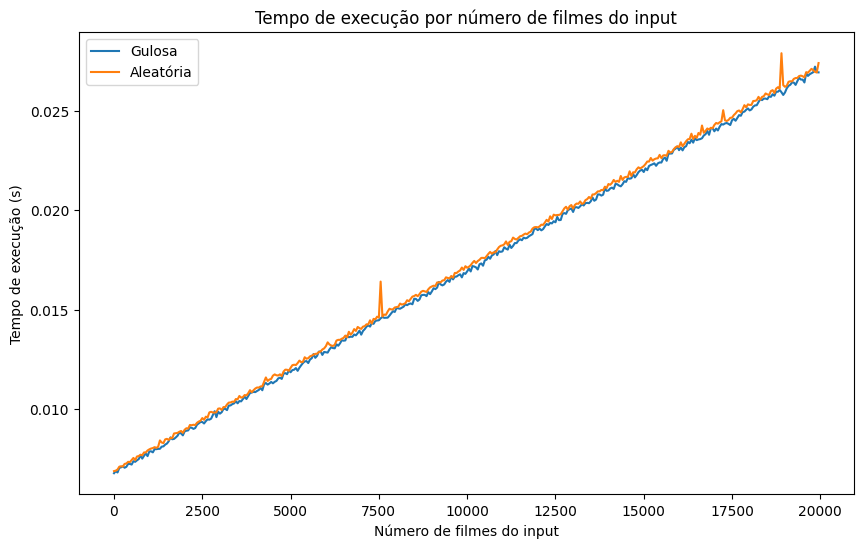

In [18]:
fix, ax = plt.subplots(figsize=(10, 6))

gulosa_df_movie = gulosa_df[['time','n_movies']]. groupby('n_movies').mean().reset_index()
aleatoria_df_movie = aleatoria_df[['time','n_movies']]. groupby('n_movies').mean().reset_index()

sns.lineplot(x='n_movies', y='time', data=gulosa_df_movie, label='Gulosa')
sns.lineplot(x='n_movies', y='time', data=aleatoria_df_movie, label='Aleatória')
ax.set_ylabel('Tempo de execução (s)')
ax.set_xlabel('Número de filmes do input')
ax.set_title('Tempo de execução por número de filmes do input')


A partir do gráfico acima, percebe-se que não ocorrreu melhoria expressiva no que se refere ao tempo de execução entre os algortimos. Além disso, salvo apenas duas exceções na heurística aleatória, o tempo de execução dos algoritmos cresce de forma linear com o número de filmes no arquivo de input. Como visto anteriormente na seção do .describe(), a média e o desvio padrão de tempo são bem próximos entre as heurísticas, descartando a necessidade de algum tipo de filtragem desses outliers.

#### Total de categorias vs tempo de execução


Text(0.5, 1.0, 'Tempo de execução por número de categorias do input')

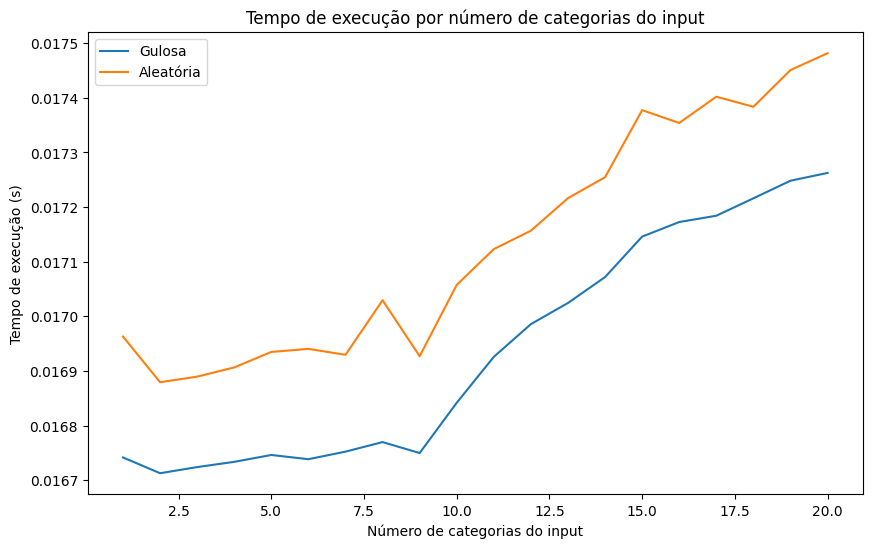

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

gulosa_df_cat = gulosa_df[['time','n_cat']]. groupby('n_cat').mean().reset_index()
aleatoria_df_cat = aleatoria_df[['time','n_cat']]. groupby('n_cat').mean().reset_index()

sns.lineplot(x='n_cat', y='time', data=gulosa_df_cat, label='Gulosa')
sns.lineplot(x='n_cat', y='time', data=aleatoria_df_cat, label='Aleatória')
ax.set_ylabel('Tempo de execução (s)')
ax.set_xlabel('Número de categorias do input')
ax.set_title('Tempo de execução por número de categorias do input')

#### Total de filmes no input vs numero de filmes na programação

Text(0.5, 1.0, 'Para n_inputs <= 2500')

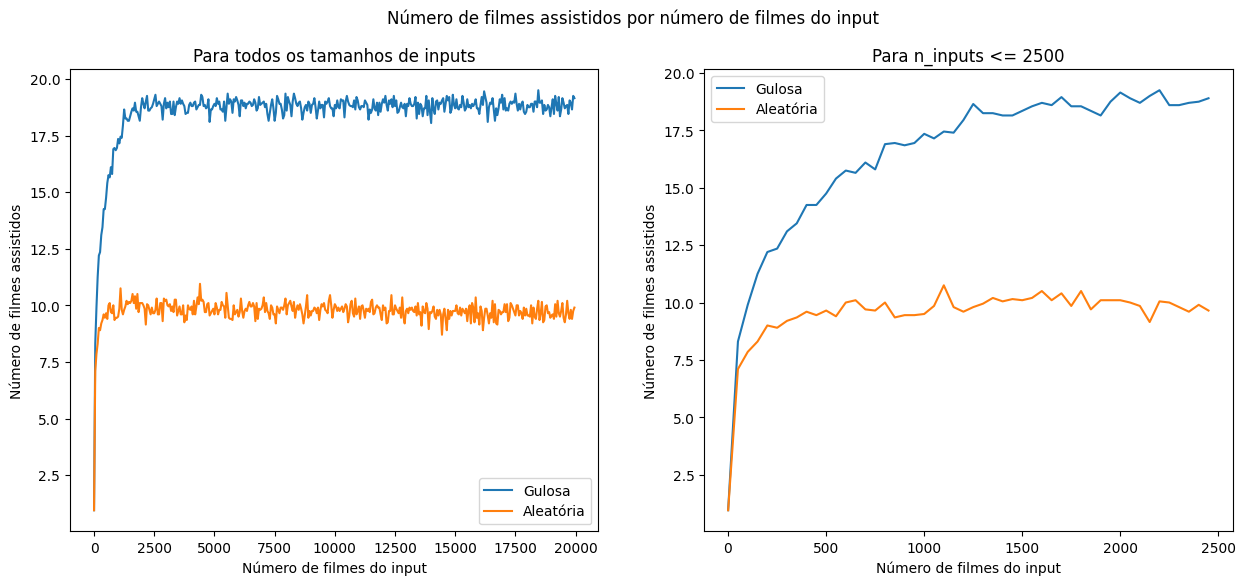

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))
# Add title to the figure
fig.suptitle('Número de filmes assistidos por número de filmes do input')
gulosa_df_prog = gulosa_df[['n_movies_watched','n_movies']]. groupby('n_movies').mean().reset_index()
aleatoria_df_prog = aleatoria_df[['n_movies_watched','n_movies']]. groupby('n_movies').mean().reset_index()

sns.lineplot(x='n_movies', y='n_movies_watched', data=gulosa_df_prog, label='Gulosa', ax=ax[0])
sns.lineplot(x='n_movies', y='n_movies_watched', data=aleatoria_df_prog, label='Aleatória', ax=ax[0])
ax[0].set_ylabel('Número de filmes assistidos')
ax[0].set_xlabel('Número de filmes do input')
ax[0].set_title('Para todos os tamanhos de inputs')

# Agora com zoom no eixo x
sns.lineplot(x='n_movies', y='n_movies_watched', data=gulosa_df_prog[gulosa_df_prog['n_movies'] <= 2500], label='Gulosa', ax=ax[1])
sns.lineplot(x='n_movies', y='n_movies_watched', data=aleatoria_df_prog[aleatoria_df_prog['n_movies'] <= 2500], label='Aleatória', ax=ax[1])
ax[1].set_ylabel('Número de filmes assistidos')
ax[1].set_xlabel('Número de filmes do input')
ax[1].set_title('Para n_inputs <= 2500')

#### Total de filmes no input vs numero de filmes na programação
